# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.
WEATHERPY AND VACATIONPY CHALLENGE
Python script is to visualize the weather of 500+ cities across the world of varying distance. From the equator using Citypy, a simple Python library, and the Open Weather map API.
Totally 562 cities were examined with their coordinates data including Longitude and Latitude. Weather data includes Temperature, Humidity, Min Temperature, Max temperature, Pressure, Sealevel, Ground level, Wind speed, Sunrise, Sunset and Time zone 562 cities.
Data cleaning was done with the condition humidity >100. No data was available.
New data frame was constructed with Humidity < 100 and it was named as clean city data.
City Latitude vs Max Temperature Plot represents more hotness in Tropical zone and slightly distributed of hotness in Temperate zone.
Latitude vs cloudiness Plot represents Cloudiness is scattered in Tropical, Temperate zone. A bunch of points have been clouded near Artic zone in North pole and South pole.
When  r< 0.25 there is no relation between two variables, 0.25<r<0.5 it’s a weak relationship, 0.5<r<0.75 has moderate relationship and r>0.75 it’s a strong relationship between two variables, which could be used in linear regression plots.
Hervey Bay, Turaif, Arak, Jalu , Oruzgan, SantaRosalia are some of the cities fall under the condition Cloudiness = 0, Temperature =70 -80 degree and Wind speed > 10.
Shells Bay Resort, Swiss Spirit Hotel, Las Casitas, Santa Rosalia are the available near by Hotels.
So lets plan for a vacation…………….



In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


585

## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

Python script is to visualize the weather of 500+ cities across the world of varying distance. From the equator using Citypy, a simple Python library, and the Open Weather map API.
Totally 562 cities were examined with their coordinates data including Longitude and Latitude. Weather data includes Temperature, Humidity, Min Temperature, Max temperature, Pressure, Sealevel, Ground level, Wind speed, Sunrise, Sunset and Time zone 562 cities.

In [6]:


# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=sitka
Processing Record 2 | Rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=rikitea
Processing Record 3 | Makkah al Mukarramah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=mecca
Processing Record 4 | Calama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=calama
Processing Record 5 | Hervey Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=hervey%20bay
Processing Record 6 | Khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=khatanga
Processing Record 7 | São José da Coroa Grande
http://api.openweathermap.org/data/

Processing Record 57 | Porbandar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=porbandar
Processing Record 58 | Quelimane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=quelimane
City not found. Skipping...
Processing Record 59 | Bayan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=bayan
Processing Record 60 | Saint-Augustin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=saint-augustin
Processing Record 61 | Barcelona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=barcelona
Processing Record 62 | Port Augusta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=port%20augusta
Processing Record 63 | Leningradskiy
http://api.openweathermap.org/data/2.5/weather?un

Processing Record 112 | Meulaboh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=meulaboh
Processing Record 113 | Touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=touros
Processing Record 114 | Ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=ostrovnoy
Processing Record 115 | Itarema
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=itarema
Processing Record 116 | Buraidah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=buraydah
Processing Record 117 | Dvinskoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=dvinskoy
Processing Record 118 | Aksu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=ak

Processing Record 168 | Abū Zabad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=abu%20zabad
Processing Record 169 | Isoka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=isoka
Processing Record 170 | Kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=kahului
Processing Record 171 | Kindu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=kindu
Processing Record 172 | Thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=thompson
City not found. Skipping...
Processing Record 173 | Craigieburn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=craigieburn
Processing Record 174 | Upata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6

Processing Record 223 | Teya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=teya
Processing Record 224 | Mount Isa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=mount%20isa
Processing Record 225 | Wawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=wawa
Processing Record 226 | Imbituba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=imbituba
Processing Record 227 | Kiunga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=kiunga
Processing Record 228 | Guozhen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=guozhen
Processing Record 229 | Katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=katsuura
Pro

Processing Record 279 | Bengkulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=bengkulu
Processing Record 280 | Vung Tau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=vung%20tau
Processing Record 281 | Ulaangom
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=ulaangom
Processing Record 282 | San Quintín
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=san%20quintin
Processing Record 283 | Bousso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=bousso
Processing Record 284 | Clyde River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=clyde%20river
Processing Record 285 | Poronaysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272

Processing Record 334 | Lucapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=lucapa
City not found. Skipping...
Processing Record 335 | Paraíso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=paraiso
Processing Record 336 | Kiryat Gat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=gat
Processing Record 337 | Hailar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=hailar
Processing Record 338 | Lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=lagoa
Processing Record 339 | Miles City
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=miles%20city
Processing Record 340 | Praia da Vitória
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34

Processing Record 389 | Nelson Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=nelson%20bay
Processing Record 390 | Gornopravdinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=gornopravdinsk
Processing Record 391 | Westport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=westport
Processing Record 392 | Grindavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=grindavik
Processing Record 393 | Port Hardy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=port%20hardy
Processing Record 394 | Dhidhdhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=dhidhdhoo
Processing Record 395 | Lokosovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d

Processing Record 446 | Burgersdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=burgersdorp
Processing Record 447 | Chegdomyn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=chegdomyn
Processing Record 448 | Fort Nelson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=fort%20nelson
Processing Record 449 | Ust'-Omchug
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=ust-omchug
Processing Record 450 | Belaya Gora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=belaya%20gora
Processing Record 451 | Malé
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=male
Processing Record 452 | Savino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d638

Processing Record 501 | Tondano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=tondano
Processing Record 502 | Kalmar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=kalmar
Processing Record 503 | Griffith
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=griffith
Processing Record 504 | Kidal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=kidal
City not found. Skipping...
Processing Record 505 | Road Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=road%20town
Processing Record 506 | Inongo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=inongo
Processing Record 507 | Rūdbār
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272c

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame
Data cleaning was done with the condition humidity >100. No data was available.
New data frame was constructed with Humidity < 100 and it was named as clean city data.

In [7]:
output_data_file = "output_data/cities.csv"
# Save data frame to .y with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          534
Cloudiness    534
Country       534
Date          534
Humidity      534
Lat           534
Lng           534
Max Temp      534
Wind Speed    534
dtype: int64

In [8]:


# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Sitka,90,US,1622174976,81,57.0531,-135.3300,48.09,6.91
1,Rikitea,26,PF,1622174777,58,-23.1203,-134.9692,71.20,3.96
2,Makkah al Mukarramah,6,SA,1622174899,48,21.4267,39.8261,84.97,5.44
3,Calama,40,CL,1622174980,81,-22.4667,-68.9333,50.49,18.41
4,Hervey Bay,0,AU,1622174981,42,-25.2986,152.8535,77.04,3.00


In [9]:
weather_data.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,534.000000,5.340000e+02,534.000000,534.000000,534.000000,534.000000,534.000000
mean,57.745318,1.622175e+09,68.202247,19.239776,16.661522,64.864401,7.665337
std,37.701836,2.501551e+02,21.528817,33.858281,88.248138,15.314472,5.574650
min,0.000000,1.622175e+09,5.000000,-54.800000,-175.200000,25.700000,0.000000
25%,20.000000,1.622175e+09,56.000000,-7.994175,-60.663300,54.055000,3.597500
50%,69.000000,1.622175e+09,72.000000,20.878550,22.932750,65.205000,6.105000
75%,94.000000,1.622176e+09,85.000000,48.898175,91.579000,77.395000,10.410000
max,100.000000,1.622176e+09,100.000000,78.218600,178.416700,95.610000,38.340000


## Inspect the data and remove the cities where the humidity > 100%.

----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
weather_data.loc[weather_data.Humidity > 100]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [11]:
#  Get the indices of cities that have humidity over 100%.
weather_data.loc[weather_data.Humidity < 100]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Sitka,90,US,1622174976,81,57.0531,-135.3300,48.09,6.91
1,Rikitea,26,PF,1622174777,58,-23.1203,-134.9692,71.20,3.96
2,Makkah al Mukarramah,6,SA,1622174899,48,21.4267,39.8261,84.97,5.44
3,Calama,40,CL,1622174980,81,-22.4667,-68.9333,50.49,18.41
4,Hervey Bay,0,AU,1622174981,42,-25.2986,152.8535,77.04,3.00
...,...,...,...,...,...,...,...,...,...
529,Iskateley,100,RU,1622175805,51,67.6803,53.1512,43.27,15.17
530,Pandamatenga,0,BW,1622175807,53,-18.5278,25.6270,50.07,2.95
531,Bintulu,40,MY,1622175808,74,3.1667,113.0333,86.41,8.05
532,Izhma,93,RU,1622175810,64,65.0083,53.9113,41.67,6.98


In [12]:

outlies = weather_data.loc[weather_data.Humidity > 100 ].index

In [13]:
clean_city_data = weather_data.drop(outlies, inplace= False)
clean_city_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Sitka,90,US,1622174976,81,57.0531,-135.3300,48.09,6.91
1,Rikitea,26,PF,1622174777,58,-23.1203,-134.9692,71.20,3.96
2,Makkah al Mukarramah,6,SA,1622174899,48,21.4267,39.8261,84.97,5.44
3,Calama,40,CL,1622174980,81,-22.4667,-68.9333,50.49,18.41
4,Hervey Bay,0,AU,1622174981,42,-25.2986,152.8535,77.04,3.00


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.
City Latitude vs Max Temperature Plot represents more hotness in Tropical zone and slightly distributed of hotness in Temperate zone.
Latitude vs cloudiness Plot represents Cloudiness is scattered in Tropical, Temperate zone. A bunch of points have been clouded near Artic zone in North pole and South pole.
When  r< 0.25 there is no relation between two variables, 0.25<r<0.5 it’s a weak relationship, 0.5<r<0.75 has moderate relationship and r>0.75 it’s a strong relationship between two variables, which could be used in linear regression plots.

## Latitude vs. Temperature Plot

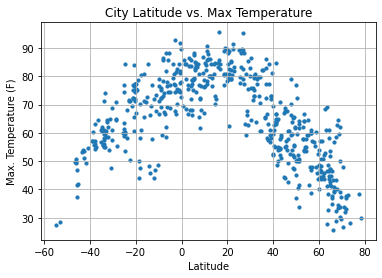

In [15]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Show plot
plt.show()


## Latitude vs. Humidity Plot

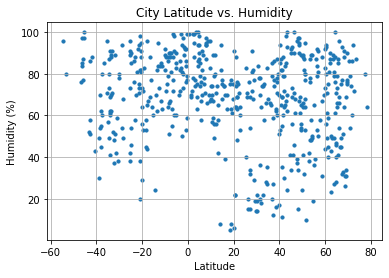

In [16]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

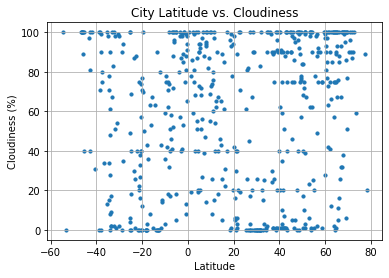

In [17]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)



# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

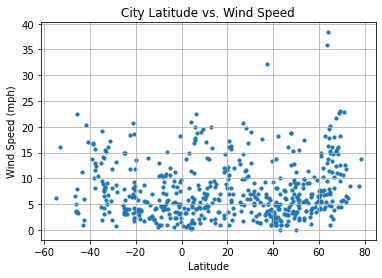

In [18]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)




# Show plot
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.35444853216714367
The equation of the regression line is: y = -0.78x + 70.07


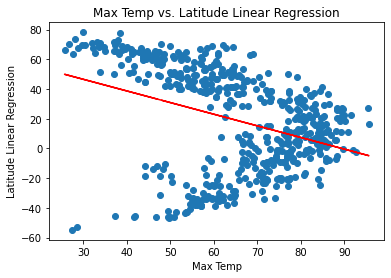

In [19]:
from scipy.stats import linregress
x_values = weather_data["Max Temp"]
                       
y_values = weather_data["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=10,color="red")
plt.title("Max Temp vs. Latitude Linear Regression")
plt.xlabel("Max Temp")
plt.ylabel("Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.35444853216714367
The equation of the regression line is: y = -0.78x + 70.07


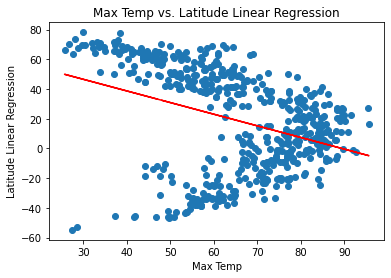

In [20]:
from scipy.stats import linregress
x_values = weather_data["Max Temp"]
                       
y_values = weather_data["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=10,color="red")
plt.title("Max Temp vs. Latitude Linear Regression")
plt.xlabel("Max Temp")
plt.ylabel("Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.15654443160208306
The equation of the regression line is: y = -0.25x + 36.03


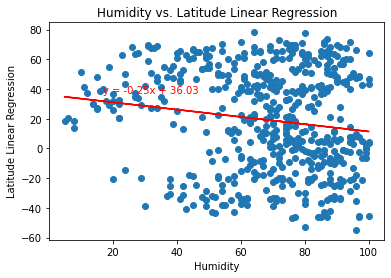

In [21]:
from scipy.stats import linregress
x_values = weather_data["Humidity"]
                       
y_values = weather_data["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=10,color="red")
plt.title("Humidity vs. Latitude Linear Regression")
plt.xlabel("Humidity")
plt.ylabel("Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.15654443160208306
The equation of the regression line is: y = -0.25x + 36.03


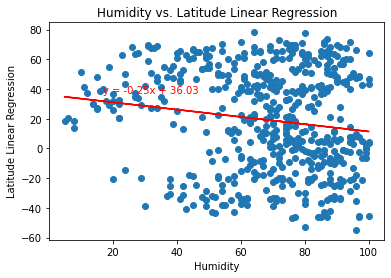

In [22]:
from scipy.stats import linregress
x_values = weather_data["Humidity"]
                       
y_values = weather_data["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=10,color="red")
plt.title("Humidity vs. Latitude Linear Regression")
plt.xlabel("Humidity")
plt.ylabel("Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.12176433597112632
The equation of the regression line is: y = 0.11x + 12.93


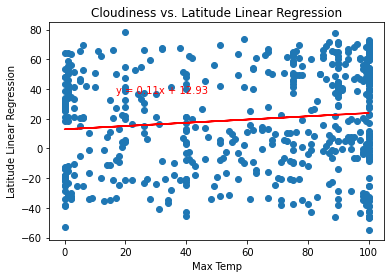

In [23]:
from scipy.stats import linregress
x_values = weather_data["Cloudiness"]
                       
y_values = weather_data["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=10,color="red")
plt.title("Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Max Temp")
plt.ylabel("Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.12176433597112632
The equation of the regression line is: y = 0.11x + 12.93


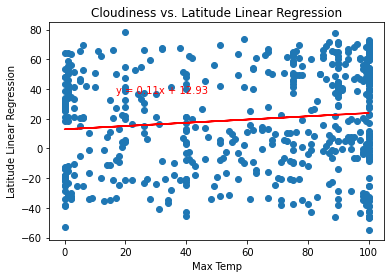

In [24]:
from scipy.stats import linregress
x_values = weather_data["Cloudiness"]
                       
y_values = weather_data["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=10,color="red")
plt.title("Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Max Temp")
plt.ylabel("Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07141610714509403
The equation of the regression line is: y = 0.43x + 15.91


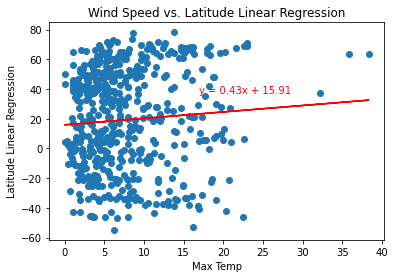

In [25]:
from scipy.stats import linregress
x_values = weather_data["Wind Speed"]
                       
y_values = weather_data["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=10,color="red")
plt.title("Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Max Temp")
plt.ylabel("Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07141610714509403
The equation of the regression line is: y = 0.43x + 15.91


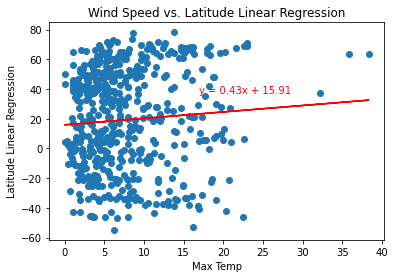

In [26]:
from scipy.stats import linregress
x_values = weather_data["Wind Speed"]
                       
y_values = weather_data["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=10,color="red")
plt.title("Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Max Temp")
plt.ylabel("Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")
plt.show()

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json

# Import API key
from apikeys import g_key

In [28]:
clean_city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Sitka,90,US,1622174976,81,57.0531,-135.3300,48.09,6.91
1,Rikitea,26,PF,1622174777,58,-23.1203,-134.9692,71.20,3.96
2,Makkah al Mukarramah,6,SA,1622174899,48,21.4267,39.8261,84.97,5.44
3,Calama,40,CL,1622174980,81,-22.4667,-68.9333,50.49,18.41
4,Hervey Bay,0,AU,1622174981,42,-25.2986,152.8535,77.04,3.00


In [29]:
# Configure gmaps
gmaps.configure(api_key=g_key)

# Locations
locations = clean_city_data[["Lat", "Lng"]]

humidity = clean_city_data["Humidity"].astype(float)

In [30]:
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, 
                                 dissipating=False, max_intensity=100,
                                 point_radius=2)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [31]:
vacation_no_cloud = clean_city_data[clean_city_data["Cloudiness"] == 0]
# Filter vacation with max temp above 70 degrees F
vacation_above_70_degrees = vacation_no_cloud[vacation_no_cloud["Max Temp"] > 70]
# Filter vacation with max temp below 80 degrees F
vacation_below_80_degrees = vacation_above_70_degrees[vacation_above_70_degrees["Max Temp"] < 80]
# Filter vacation with wind speed below 10 mph
vacation_slow_wind = vacation_below_80_degrees[vacation_below_80_degrees["Wind Speed"] < 10]
# Filter vacation with humidity below 60 %
perfect_vacation = vacation_slow_wind[vacation_slow_wind["Humidity"] < 60]
# Set Index
indexed_perfect_vacation = perfect_vacation.reset_index()
del indexed_perfect_vacation["index"]
indexed_perfect_vacation

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hervey Bay,0,AU,1622174981,42,-25.2986,152.8535,77.04,3.00
1,Turaif,0,SA,1622175195,20,31.6725,38.6637,72.90,9.15
2,Arak,0,IR,1622175424,28,34.0917,49.6892,70.54,1.41
3,Jalu,0,LY,1622175453,29,29.0331,21.5482,75.61,7.67
4,Oruzgan,0,AF,1622175551,22,32.8333,66.0000,77.22,1.57
5,Santa Rosalía,0,MX,1622175669,32,27.3167,-112.2833,77.14,4.76


In [32]:
vaca_locations = indexed_perfect_vacation[["Lat", "Lng"]]

vaca_humidity = indexed_perfect_vacation["Humidity"].astype(float)

# Plot Heatmap
vaca_fig = gmaps.figure()

# Create heat layer
vaca_heat_layer = gmaps.heatmap_layer(vaca_locations, weights=vaca_humidity, 
                                 dissipating=False, max_intensity=50,
                                 point_radius=2.5)

# Add layer
vaca_fig.add_layer(vaca_heat_layer)

# Display figure
vaca_fig

Figure(layout=FigureLayout(height='420px'))

In [33]:
# Hotel variable
hotels = []

# Loop through narrowed down dataframe to get nearest hotel
for city in range(len(indexed_perfect_vacation["City"])):

    lat = indexed_perfect_vacation.loc[city]["Lat"]
    lng = indexed_perfect_vacation.loc[city]["Lng"]

    city_coords = f"{lat},{lng}"

    params = {
        "location": city_coords, 
        "types": "lodging",
        "radius": 5000,
        "key": g_key
    }

    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"   

    hotel_request = requests.get(base_url, params=params)
    hotel_response = hotel_request.json()

    try:
        hotels.append(hotel_response["results"][0]["name"])
    except:
        hotels.append("Nearest hotel not found")

# Dataframe with nearest hotel
indexed_perfect_vacation["Nearest Hotel"] = hotels
indexed_perfect_vacation

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Nearest Hotel
0,Hervey Bay,0,AU,1622174981,42,-25.2986,152.8535,77.04,3.00,Shelly Bay Resort
1,Turaif,0,SA,1622175195,20,31.6725,38.6637,72.90,9.15,Swiss Spirit Hotel & Suites Turaif
2,Arak,0,IR,1622175424,28,34.0917,49.6892,70.54,1.41,خانه سازمانهای غیر دولتی استان مرکزی
3,Jalu,0,LY,1622175453,29,29.0331,21.5482,75.61,7.67,صاحبة الفخامة
4,Oruzgan,0,AF,1622175551,22,32.8333,66.0000,77.22,1.57,Nearest hotel not found
5,Santa Rosalía,0,MX,1622175669,32,27.3167,-112.2833,77.14,4.76,Hotel Las Casitas Santa Rosalia


In [34]:
info_box_template = """
<dl>
<dt>Name</dt><dd>{Nearest Hotel}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
hotel_info = [info_box_template.format(**row) for index, row in indexed_perfect_vacation.iterrows()]
locations = indexed_perfect_vacation[["Lat", "Lng"]]

In [35]:
markers = gmaps.marker_layer(locations, info_box_content= [f"Nearest Hotel: {hotel}" for hotel in hotels])
vaca_fig.add_layer(markers)

# Display Map
vaca_fig

Figure(layout=FigureLayout(height='420px'))